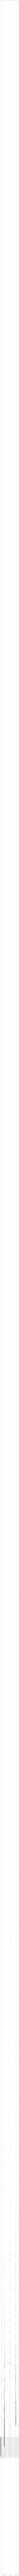

In [23]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def steamTags():
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamTags['likeRatio'] = steamTags.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    columns = steamTags.columns.values
    print("TAG,AVERAGE_TIME,VARIANCE,AVERAGE_RATING,VARIANCE,AVERAGE_PRICE,VARIANCE,NUMBER OF GAMES")
    for column in columns:
        if ('tags.' not in column):
            continue
        steamFiltered = steamTags[(steamTags[column].notna()) & (steamTags[column] >= 100) & (steamTags['avarageTime'] != 0) & (steamTags['positiveReviews'] + steamTags['negativeReviews'] >= 100)]
        numberOfGames = len(steamFiltered[column])
        if (numberOfGames < 100):
            continue
        avarageTime = np.mean(steamFiltered['avarageTime'])
        varianceTime = np.sqrt(np.var(steamFiltered['avarageTime']))
        avarageRating = np.mean(steamFiltered['likeRatio'])
        varianceRating = np.sqrt(np.var(steamFiltered['likeRatio']))
        avaragePrice =  np.mean(steamFiltered['priceInEur'])
        variancePrice = np.sqrt(np.var(steamFiltered['priceInEur']))
        print(f"{column.replace('tags.','')},{avarageTime},{varianceTime},{avarageRating},{varianceRating},{avaragePrice},{variancePrice},{numberOfGames}")

def elaborate(dataframe,field):
    avarage = np.mean(dataframe[field])
    variance = np.sqrt(np.var(dataframe[field]))
    elements = len(dataframe[field])
    minValue = np.min(dataframe[field])
    maxValue = np.max(dataframe[field])
    firstQuantile = np.quantile(dataframe[field],0.25)
    thirdQuantile = np.quantile(dataframe[field],0.75)
    print(f"{avarage},{variance},{elements},{minValue},{maxValue},{firstQuantile},{thirdQuantile}")

def plot(data):
    dataframe = pd.DataFrame(data)
    boxPlot = dataframe.plot(kind='box',figsize=(6,900),logy=False,grid=True,yticks=range(0,100)).get_figure()
    boxPlot.savefig('modality_boxplot_nreviews.png')

def steamGames():
    steamGames = pd.read_csv("../static/STEAM_GAMES.csv")
    steamReviews =  pd.read_csv("../static/STEAM_REVIEWS.csv")
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamGames = pd.merge(steamGames,steamReviews,how="inner",on=['gameId','gameId'])[['gameId','title','priceInEur','modality','releaseDate','positiveReviews','negativeReviews','meanHours']]
    steamGames = pd.merge(steamGames,steamTags,how="inner",on=['gameId','gameId'])[['title_x','priceInEur_y','modality','releaseDate','positiveReviews_x','negativeReviews_x','meanHours']]
    steamGames = steamGames.rename(columns={"priceInEur_y": "priceInEur","positiveReviews_x":"positiveReviews","negativeReviews_x":"negativeReviews"})
    steamGames = steamGames[(steamGames['positiveReviews']+steamGames['negativeReviews'] >= 20)]
    steamGames['likeRatio'] = steamGames.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    steamGames['nReviews'] = steamGames.apply(lambda row: row['positiveReviews']+row['negativeReviews'], axis=1)
    onlyMulti = steamGames[(steamGames['modality'].str.contains('MULTI-PLAYER')) & (~steamGames['modality'].str.contains('SINGLE-PLAYER'))]
    onlySingle = steamGames[(~steamGames['modality'].str.contains('MULTI-PLAYER')) & (steamGames['modality'].str.contains('SINGLE-PLAYER'))]
    bothModality = steamGames[(steamGames['modality'].str.contains('MULTI-PLAYER')) & (steamGames['modality'].str.contains('SINGLE-PLAYER'))]
    likeData = { "SINGLE": onlySingle['likeRatio'], "MULTI": onlyMulti['likeRatio'], "BOTH": bothModality['likeRatio']}
    priceData = { "SINGLE": onlySingle['priceInEur'], "MULTI": onlyMulti['priceInEur'], "BOTH": bothModality['priceInEur']}
    hoursData = { "SINGLE": onlySingle['meanHours'], "MULTI": onlyMulti['meanHours'], "BOTH": bothModality['meanHours']}
    reviewData = { "SINGLE": onlySingle['nReviews'], "MULTI": onlyMulti['nReviews'], "BOTH": bothModality['nReviews']}

    #ax.set_yscale('log')
    #fig.savefig('modality_num_of_games.png')
    plot(hoursData)

steamGames()


 1885
CASUAL 222
STRATEGY 438
RPG 477
ADVENTURE 691
SIMULATION 455
INDIE 930
ACTION 1055


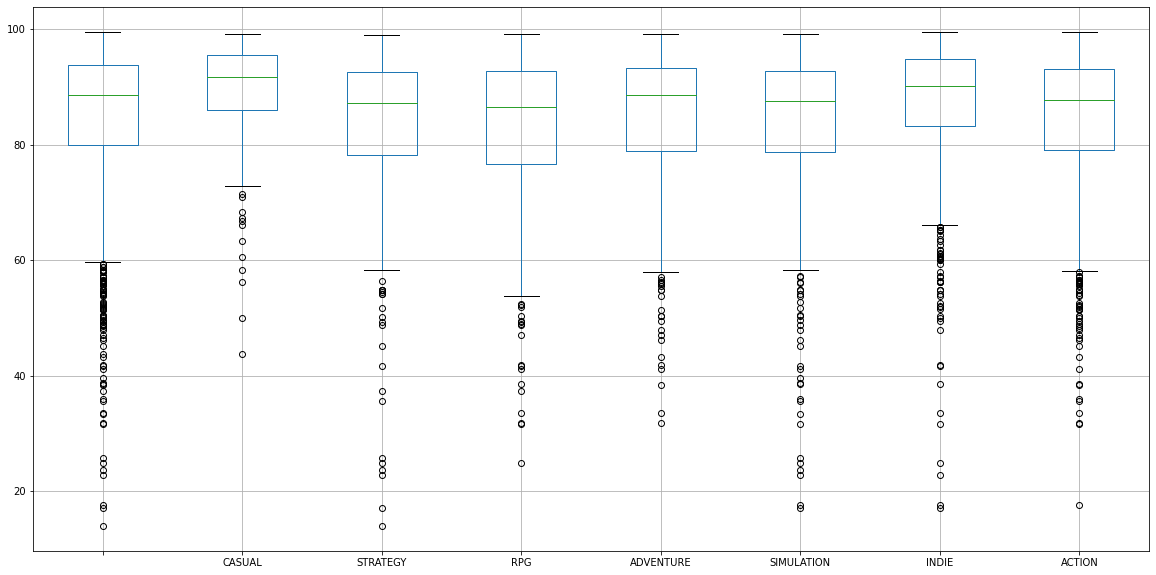

In [11]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib

def steamTags():
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamTags['likeRatio'] = steamTags.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    columns = steamTags.columns.values
    print("TAG,AVERAGE_TIME,VARIANCE,AVERAGE_RATING,VARIANCE,AVERAGE_PRICE,VARIANCE,NUMBER OF GAMES")
    for column in columns:
        if ('tags.' not in column):
            continue
        steamFiltered = steamTags[(steamTags[column].notna()) & (steamTags[column] >= 150) & (steamTags['avarageTime'] != 0) & (steamTags['positiveReviews'] + steamTags['negativeReviews'] >= 100)]
        numberOfGames = len(steamFiltered[column])
        if (numberOfGames < 100):
            continue
        avarageTime = np.mean(steamFiltered['avarageTime'])
        varianceTime = np.sqrt(np.var(steamFiltered['avarageTime']))
        avarageRating = np.mean(steamFiltered['likeRatio'])
        varianceRating = np.sqrt(np.var(steamFiltered['likeRatio']))
        avaragePrice =  np.mean(steamFiltered['priceInEur'])
        variancePrice = np.sqrt(np.var(steamFiltered['priceInEur']))
        print(f"{column.replace('tags.','')},{avarageTime},{varianceTime},{avarageRating},{varianceRating},{avaragePrice},{variancePrice},{numberOfGames}")

def elaborate(dataframe):
    avarage = np.mean(dataframe['likeRatio'])
    variance = np.sqrt(np.var(dataframe['likeRatio']))
    elements = len(dataframe['likeRatio'])
    minValue = np.min(dataframe['likeRatio'])
    maxValue = np.max(dataframe['likeRatio'])
    firstQuantile = np.quantile(dataframe['likeRatio'],0.25)
    thirdQuantile = np.quantile(dataframe['likeRatio'],0.75)
    print(f"{avarage},{variance},{elements},{minValue},{maxValue},{firstQuantile},{thirdQuantile}")

def plot(data):
    dataframe = pd.DataFrame(data)
    boxPlot = dataframe.boxplot(figsize=(20,10))

def steamGames():
    steamGames = pd.read_csv("../static/STEAM_GAMES.csv")
    steamReviews =  pd.read_csv("../static/STEAM_REVIEWS.csv")
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamGames = pd.merge(steamGames,steamReviews,how="inner",on=['gameId','gameId'])[['gameId','title','priceInEur','modality','releaseDate','positiveReviews','negativeReviews','meanHours']]
    steamGames = pd.merge(steamGames,steamTags,how="inner",on=['gameId','gameId'])[['title_x','priceInEur_y','modality','releaseDate','positiveReviews_y','negativeReviews_y','meanHours','avarageTime']]
    steamGames = steamGames.rename(columns={"priceInEur_y": "priceInEur","positiveReviews_y":"positiveReviews","negativeReviews_y":"negativeReviews"})
    steamGames = steamGames[steamGames['positiveReviews']+steamGames['negativeReviews'] >= 1000]
    steamGames['likeRatio'] = steamGames.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    steamGames['nReviews'] = steamGames.apply(lambda row: row['positiveReviews']+row['negativeReviews'], axis=1)
    onlyMulti = steamGames[(steamGames['modality'].str.contains('MULTI-PLAYER')) & (~steamGames['modality'].str.contains('SINGLE-PLAYER'))]
    onlySingle = steamGames[(~steamGames['modality'].str.contains('MULTI-PLAYER')) & (steamGames['modality'].str.contains('SINGLE-PLAYER'))]
    bothModality = steamGames[(steamGames['modality'].str.contains('MULTI-PLAYER')) & (steamGames['modality'].str.contains('SINGLE-PLAYER'))]
    likeData = { "SINGLE": onlySingle['likeRatio'], "MULTI": onlyMulti['likeRatio'], "BOTH": bothModality['likeRatio']}
    priceData = { "SINGLE": onlySingle['priceInEur'], "MULTI": onlyMulti['priceInEur'], "BOTH": bothModality['priceInEur']}
    hoursData = { "SINGLE": onlySingle['meanHours'], "MULTI": onlyMulti['meanHours'], "BOTH": bothModality['meanHours']}
    reviewData = { "SINGLE": onlySingle['nReviews'], "MULTI": onlyMulti['nReviews'], "BOTH": bothModality['nReviews']}
    plot(reviewData)

def steamGenres():
    steamGames = pd.read_csv("../static/STEAM_GAMES.csv")
    steamGames = steamGames[steamGames['positiveReviews']+steamGames['negativeReviews'] >= 1000]
    steamGames['likeRatio'] = steamGames.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    genresAll = map(lambda x: x.replace("[","").replace("]","").replace('"',"").split(","),steamGames['genre'])
    genreArray = []
    genreDic = {}
    for genre in genresAll:
        for subGenre in genre:
            genreArray.append(subGenre)
    genreArray = set(genreArray)
    for genre in genreArray:
        if len(steamGames[steamGames['genre'].str.contains(genre)]) > 200:
            print(genre,len(steamGames[steamGames['genre'].str.contains(genre)]))
            genreDic[genre] = steamGames[steamGames['genre'].str.contains(genre)]['likeRatio']
    plot(genreDic)

steamGenres()


TAG,AVERAGE_TIME,VARIANCE,AVERAGE_RATING,VARIANCE,AVERAGE_PRICE,VARIANCE,NUMBER OF GAMES


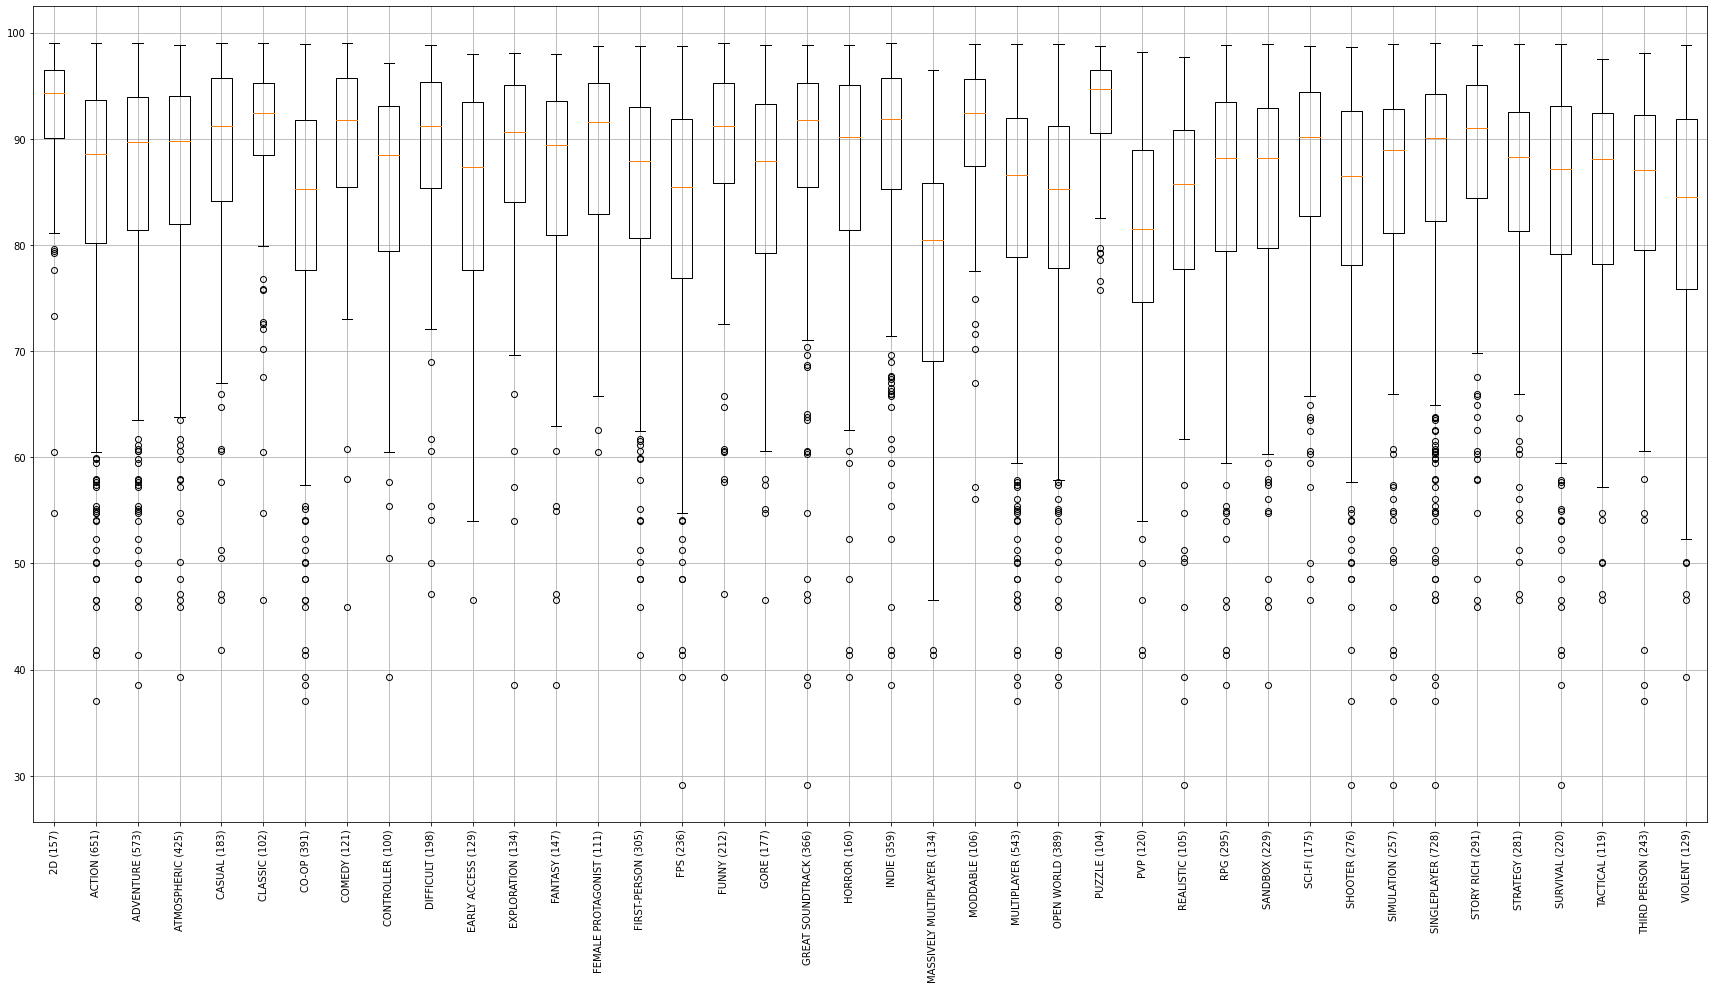

In [48]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

def steamTags():
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamTags['likeRatio'] = steamTags.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    columns = steamTags.columns.values
    print("TAG,AVERAGE_TIME,VARIANCE,AVERAGE_RATING,VARIANCE,AVERAGE_PRICE,VARIANCE,NUMBER OF GAMES")
    genres = {}
    for column in columns:
        if ('tags.' not in column or column == "tags"):
            continue
        steamFiltered = steamTags[(steamTags[column].notna()) & (steamTags['avarageTime'] != 0) & (steamTags['positiveReviews'] + steamTags['negativeReviews'] >= 10000)]
        numberOfGames = len(steamFiltered[column])
        if (numberOfGames < 100):
            continue
        genres[column.replace('tags.','')] = steamFiltered['likeRatio']
    fig, ax = plt.subplots(figsize=(30,15))
    ax.boxplot(list(map(lambda genre: genres[genre],genres.keys())))
    #ax.set_yscale('log')
    ax.grid(True)
    ax.set_xticklabels(list(map(lambda genre: f"{genre} ({len(genres[genre])})",genres.keys())),rotation=90)



steamTags()


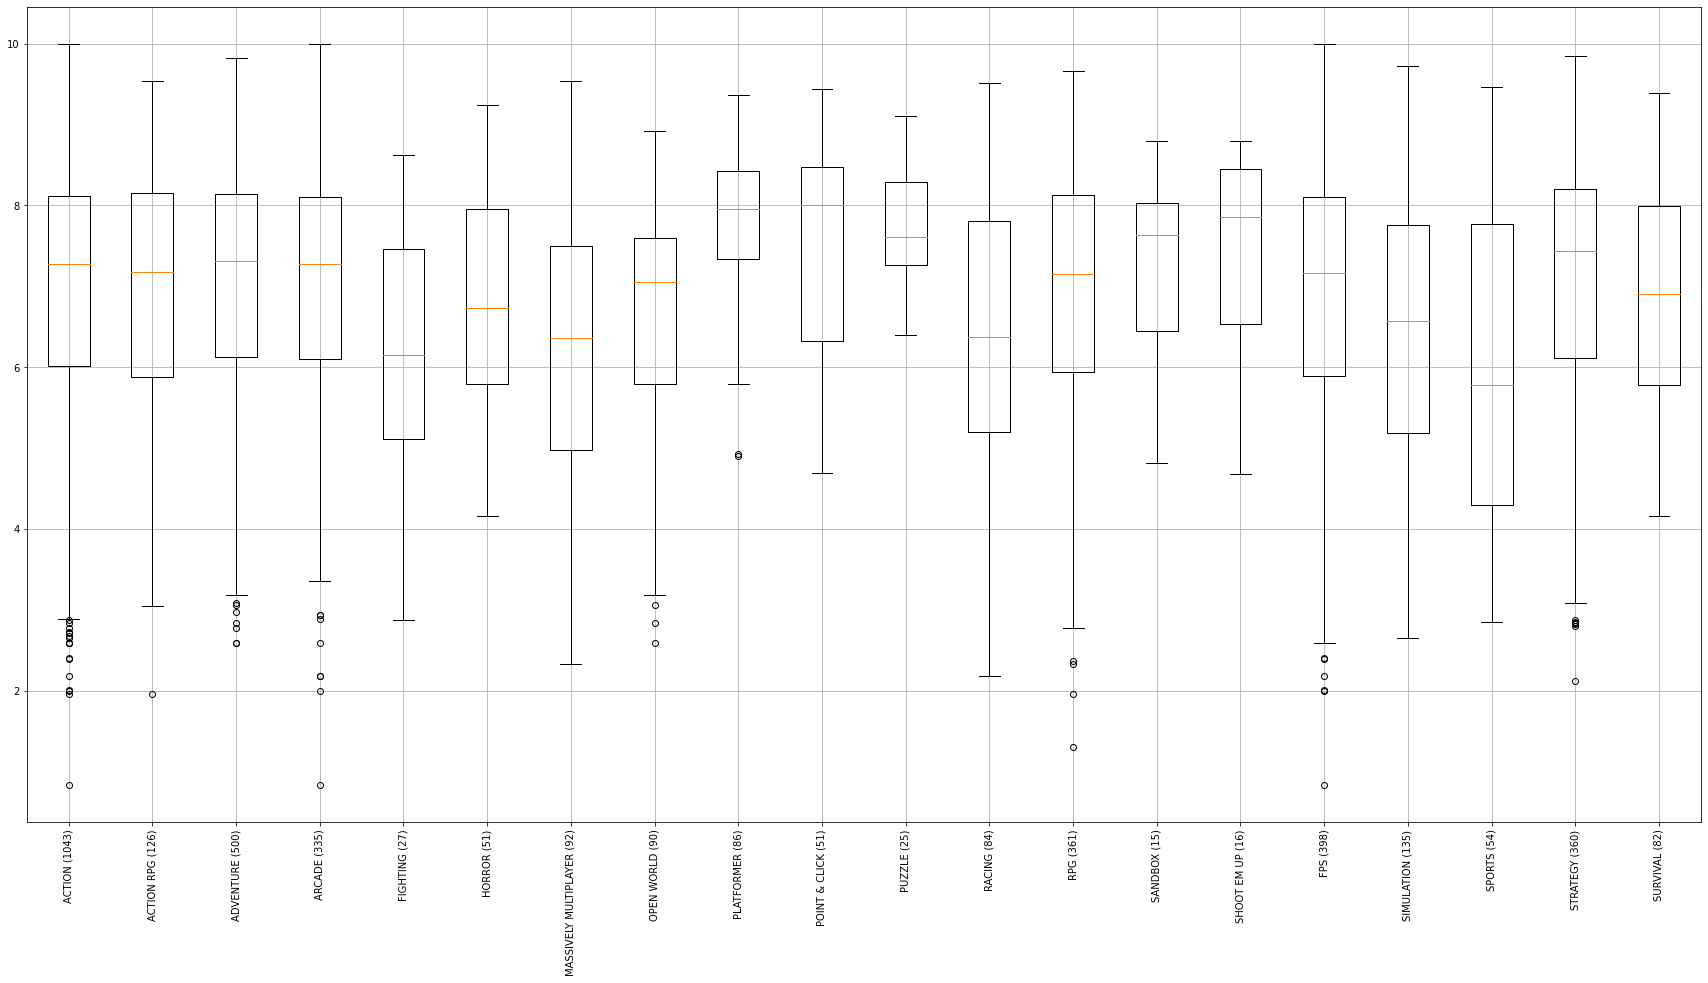

In [73]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

def metaGames():
    metaGames = pd.read_csv("../static/METACRITIC_PC_REVIEWS.csv")
    metaGames = metaGames[metaGames['userNumberReviews'] >= 20]
    genres = map(lambda x: x.replace("[","").replace("]","").replace('"',"").split(","),metaGames['genre'])
    outGenres = []
    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres']
    
    genreDictionary = {}
    for genre in genresList:
        for index, game in metaGames.iterrows():
            if(genre in game['genre']):
                if genre not in genreDictionary.keys():
                    genreDictionary[genre] = []
                genreDictionary[genre].append(game['userMeanValue'])
    fig, ax = plt.subplots(figsize=(30,15))
    genreArray = list(map(lambda genre: genreDictionary[genre],genresList))
    ax.boxplot(genreArray)
    #ax.set_yscale('log')
    ax.grid(True)
    
    #outGenres = list(filter(lambda genre: len(genreDictionary[genre]) >= 20,list(set(outGenres))))
    genresList = list(map(lambda genre: f"{genre} ({len(genreDictionary[genre])})",genresList))
    ax.set_xticklabels(genresList,rotation=90)

metaGames()

['GORE', 'EARLY ACCESS', 'ADVENTURE', 'ACTION', 'MASSIVELY MULTIPLAYER', 'SEXUAL CONTENT', 'NUDITY', 'SPORTS', 'RPG', 'FREE TO PLAY', 'VIOLENT', 'STRATEGY', 'RACING', 'SIMULATION', 'UTILITIES', 'CASUAL', 'INDIE', 'MOVIE']
                                   title  priceInEur  \
0                         COUNTER-STRIKE        9.99   
4                          ULTIMATE DOOM        4.99   
5                                  QUAKE        4.99   
6      ROLLERCOASTER TYCOON® 3: PLATINUM        0.00   
8                   688(I) HUNTER/KILLER        9.99   
...                                  ...         ...   
34643                          我的上司有點不正常        0.00   
34682                           ANNALYNN        4.99   
34710                    KNIGHTS COLLEGE       24.99   
34723          SUICIDE COUNTDOWN: 7 DAYS        2.99   
34735             MOSAIQUE NEKO WAIFUS 4        1.99   

                                     genre  \
0                               ["ACTION"]   
4            

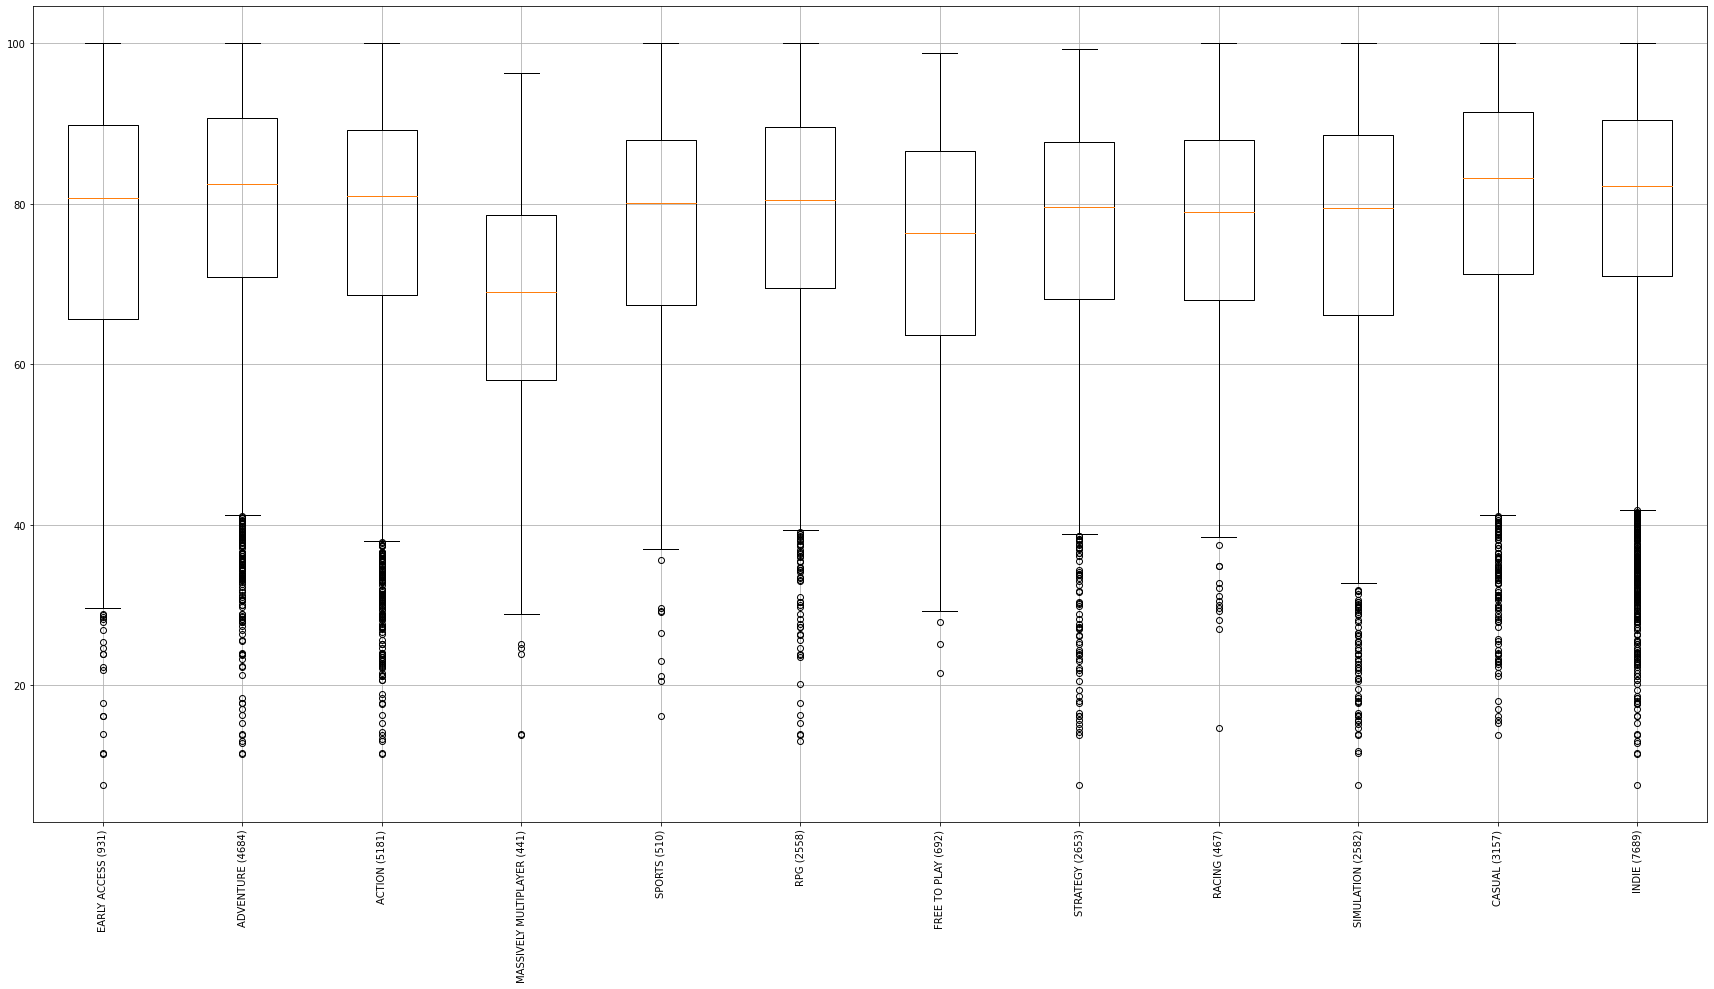

In [2]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

def steamGames():
    steamGames = pd.read_csv("../static/STEAM_GAMES.csv").drop_duplicates()
    steamReviews =  pd.read_csv("../static/STEAM_REVIEWS.csv").drop_duplicates()
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv").drop_duplicates()
    steamGames = pd.merge(steamGames,steamReviews,how="inner",on=['gameId','gameId'])[[
        'gameId',
        'title',
        'priceInEur',
        'genre',
        'modality',
        'releaseDate',
        'positiveReviews',
        'negativeReviews',
        'meanHours'
    ]]
    steamGames = pd.merge(steamGames,steamTags,how="inner",on=['gameId','gameId'])[[
        'title_x',
        'priceInEur_y',
        'genre_y',
        'modality',
        'releaseDate',
        'positiveReviews_y',
        'negativeReviews_y',
        'meanHours',
        'avarageTime'
    ]]
    steamGames = steamGames.rename(columns={
        "title_x": "title",
        "priceInEur_y": "priceInEur",
        "positiveReviews_y":"positiveReviews",
        "negativeReviews_y":"negativeReviews",
        "genre_y": "genre"
    })
    steamGames = steamGames[steamGames['positiveReviews']+steamGames['negativeReviews'] >= 100]
    steamGames['likeRatio'] = steamGames.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    steamGames['nReviews'] = steamGames.apply(lambda row: row['positiveReviews']+row['negativeReviews'], axis=1)
    genres = map(lambda x: x.replace("[","").replace("]","").replace('"',"").split(","),steamGames['genre'])
    outGenres = []
    for genre in genres:
        for subGenre in genre:
            if (subGenre != ''):
                outGenres.append(subGenre)
    outGenres = list(set(outGenres))
    steamGames = steamGames.drop_duplicates()
    print(outGenres)
    print(steamGames)
    genreDictionary = {}
    otherDictionary = {}
    for genre in outGenres:
        for index, game in steamGames.iterrows():
            if(genre in game['genre']):
                if genre not in genreDictionary.keys():
                    genreDictionary[genre] = []
                genreDictionary[genre].append(game['likeRatio'])
                if genre not in otherDictionary.keys():
                    otherDictionary[genre] = []
                otherDictionary[genre].append(game['negativeReviews'])
    #plt.scatter(otherDictionary['MASSIVELY MULTIPLAYER'],genreDictionary['MASSIVELY MULTIPLAYER'])
    #plt.xscale('log')
    fig, ax = plt.subplots(figsize=(30,15))
    genreArray = list(map(lambda genre: genreDictionary[genre],outGenres))
    ax.boxplot(list(filter(lambda genre: len(genre) >= 20,genreArray)))
    #ax.set_yscale('log')
    ax.grid(True)

    outGenres = list(filter(lambda genre: len(genreDictionary[genre]) >= 20,outGenres))
    outGenres = list(map(lambda genre: f"{genre} ({len(genreDictionary[genre])})",outGenres))
    ax.set_xticklabels(outGenres,rotation=90)
    #fig.savefig('steam_games_likeratio.png')



steamGames()


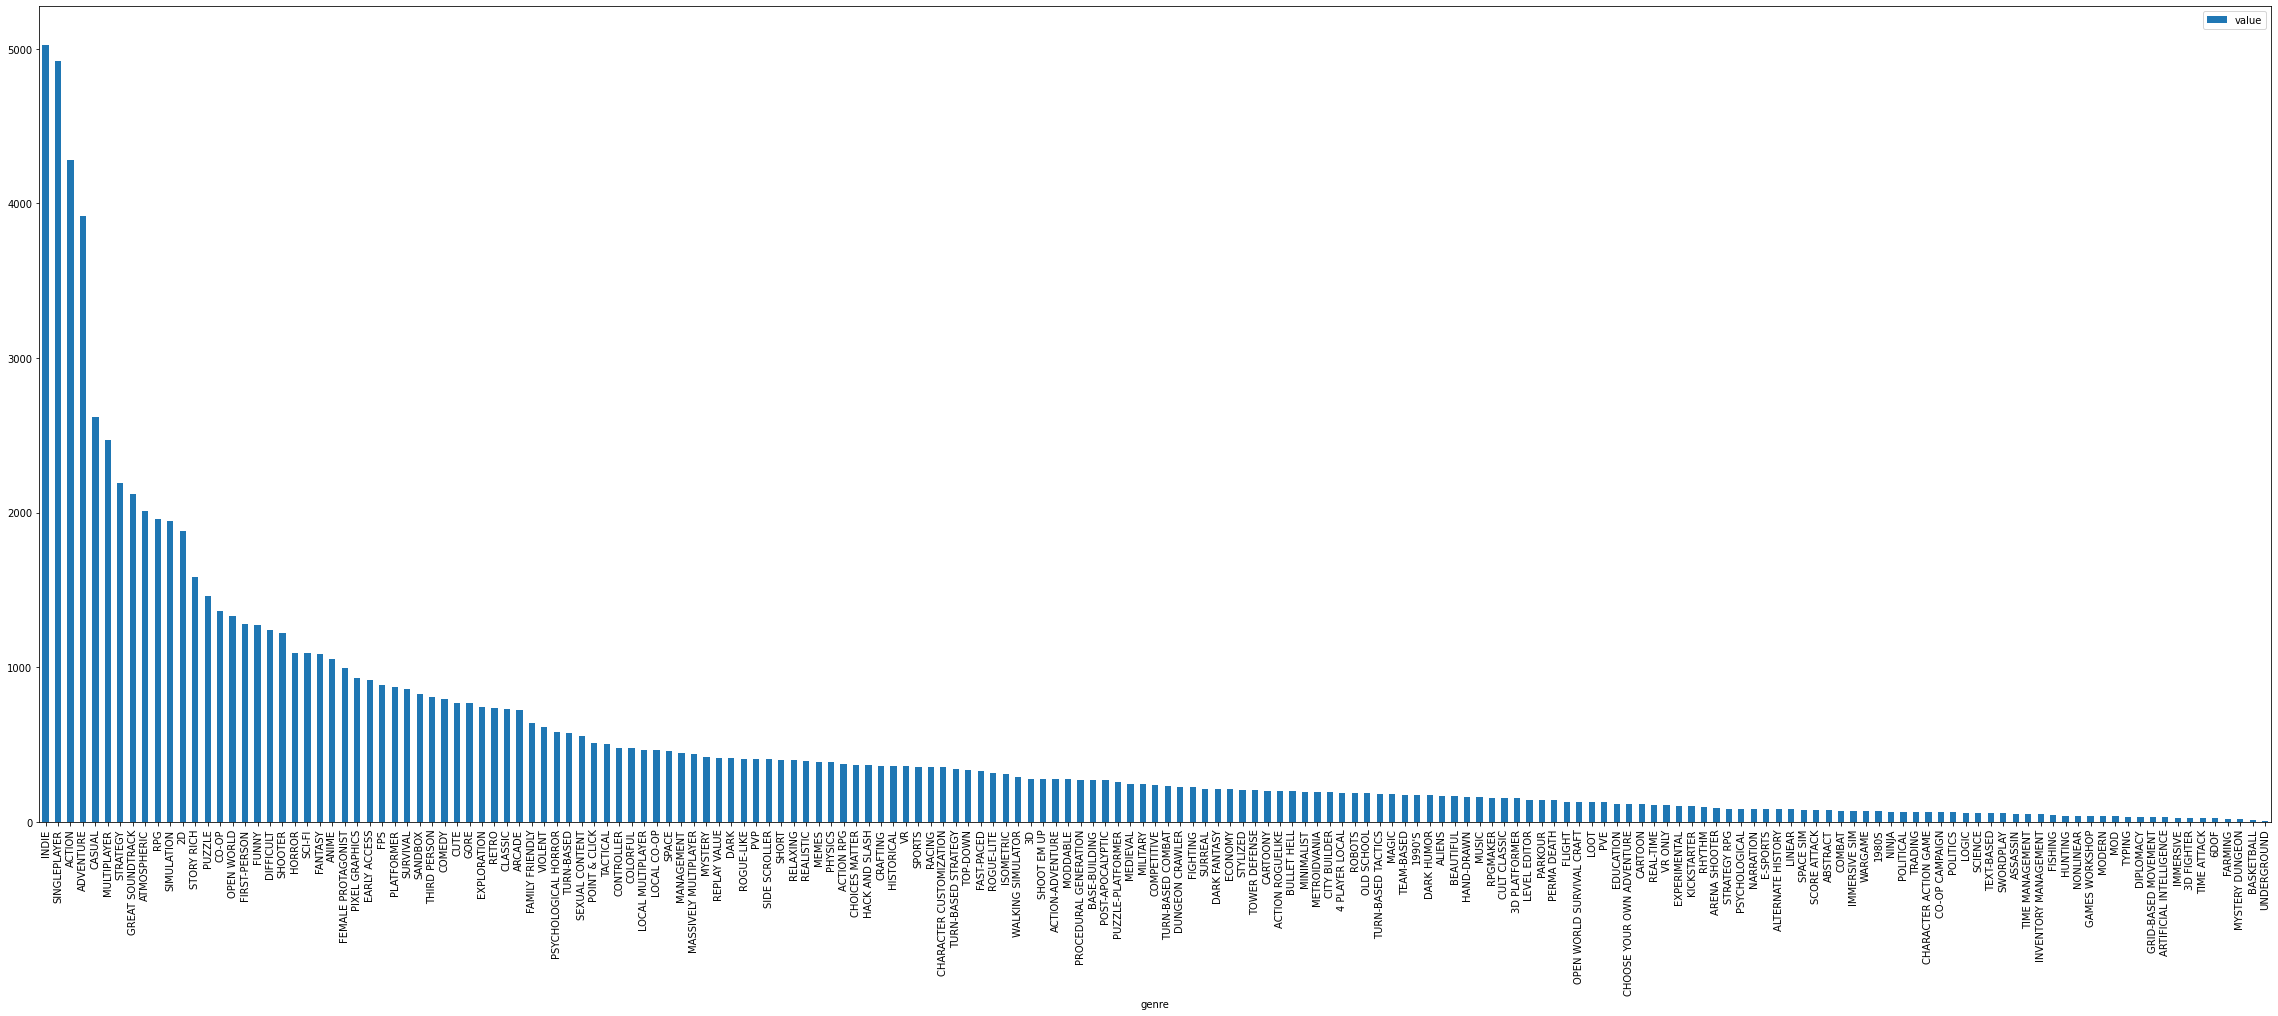

In [3]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

def steamTags():
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamTags['likeRatio'] = steamTags.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    columns = steamTags.columns.values
    genres = {}
    for column in columns:
        if ('tags.' not in column or column == "tags"):
            continue
        steamFiltered = steamTags[(steamTags[column].notna()) & (steamTags['avarageTime'] != 0) & (steamTags['positiveReviews'] + steamTags['negativeReviews'] >= 100)]
        numberOfGames = len(steamFiltered[column])
        genres[column.replace('tags.','')] = numberOfGames
    tempData = pd.DataFrame({"genre":list(genres.keys()),"value":list(genres.values())})
    tempData = tempData.sort_values(by='value',ascending=False)
    fig, ax = plt.subplots(figsize=(40,15))
    figuraToSave = tempData.plot(kind='bar', x='genre', y='value', ax=ax).get_figure()
    plt.show()
    figuraToSave.savefig('tags_bars.png')



steamTags()


['ACTION', 'ADVENTURE', 'STRATEGY', 'RPG', 'SIMULATION', 'PUZZLE', 'OPEN WORLD', 'HORROR', 'FPS', 'PLATFORMER', 'SURVIVAL', 'SANDBOX', 'ARCADE', 'POINT & CLICK', 'MASSIVELY MULTIPLAYER', 'ROGUE-LIKE', 'ACTION RPG', 'SPORTS', 'RACING', 'FIGHTING', 'CITY BUILDER']


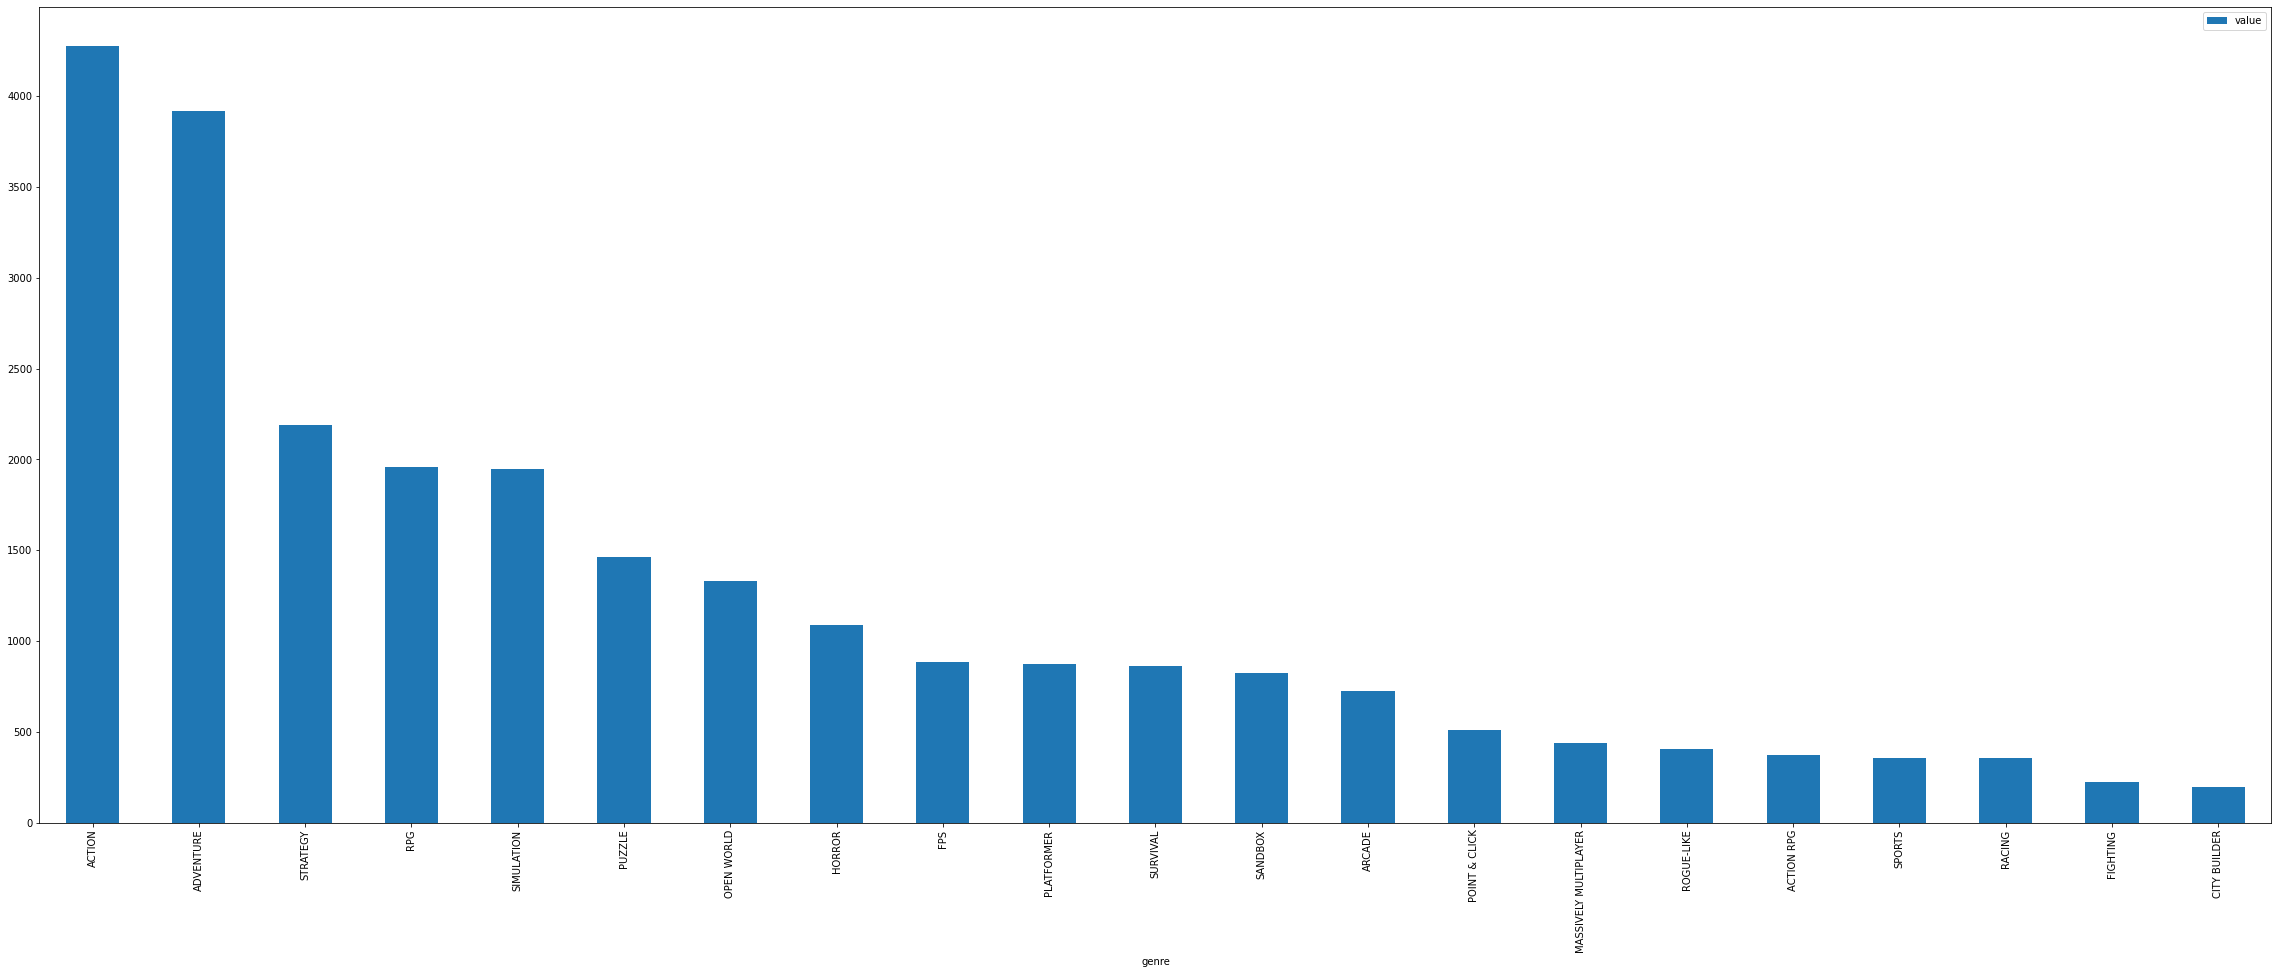

In [61]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt


def steamTags():
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamTags['likeRatio'] = steamTags.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres'] 
    columns = steamTags.columns.values
    genres = {}
    for column in columns:
        if ('tags.' not in column or column == "tags"):
            continue
        steamFiltered = steamTags[(steamTags[column].notna()) & (steamTags['avarageTime'] != 0) & (steamTags['positiveReviews'] + steamTags['negativeReviews'] >= 100)]
        numberOfGames = len(steamFiltered[column])
        genres[column.replace('tags.','')] = numberOfGames
    tempData = pd.DataFrame({"genre":list(genres.keys()),"value":list(genres.values())})
    tempData = tempData.sort_values(by='value',ascending=False)

    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres'] 

    tempData = tempData[tempData['genre'].isin(genresList)]
    fig, ax = plt.subplots(figsize=(40,15))
    print(list(tempData['genre']))
    figuraToSave = tempData.plot(kind='bar', x='genre', y='value', ax=ax).get_figure()
    plt.show()
    #figuraToSave.savefig('tags_bars_filtered.png')
    



steamTags()


                     genre  value
33                  ACTION   1043
99               ADVENTURE    500
112                    FPS    398
102                    RPG    361
73                STRATEGY    360
87                  ARCADE    335
26              SIMULATION    135
66              ACTION RPG    126
78   MASSIVELY MULTIPLAYER     92
95              OPEN WORLD     90
62              PLATFORMER     86
126                 RACING     84
75                SURVIVAL     82
105                 SPORTS     54
69           POINT & CLICK     51
110                 HORROR     51
1                 FIGHTING     27
12                  PUZZLE     25
5              SHOOT EM UP     16
19                 SANDBOX     15
107           CITY BUILDER     12


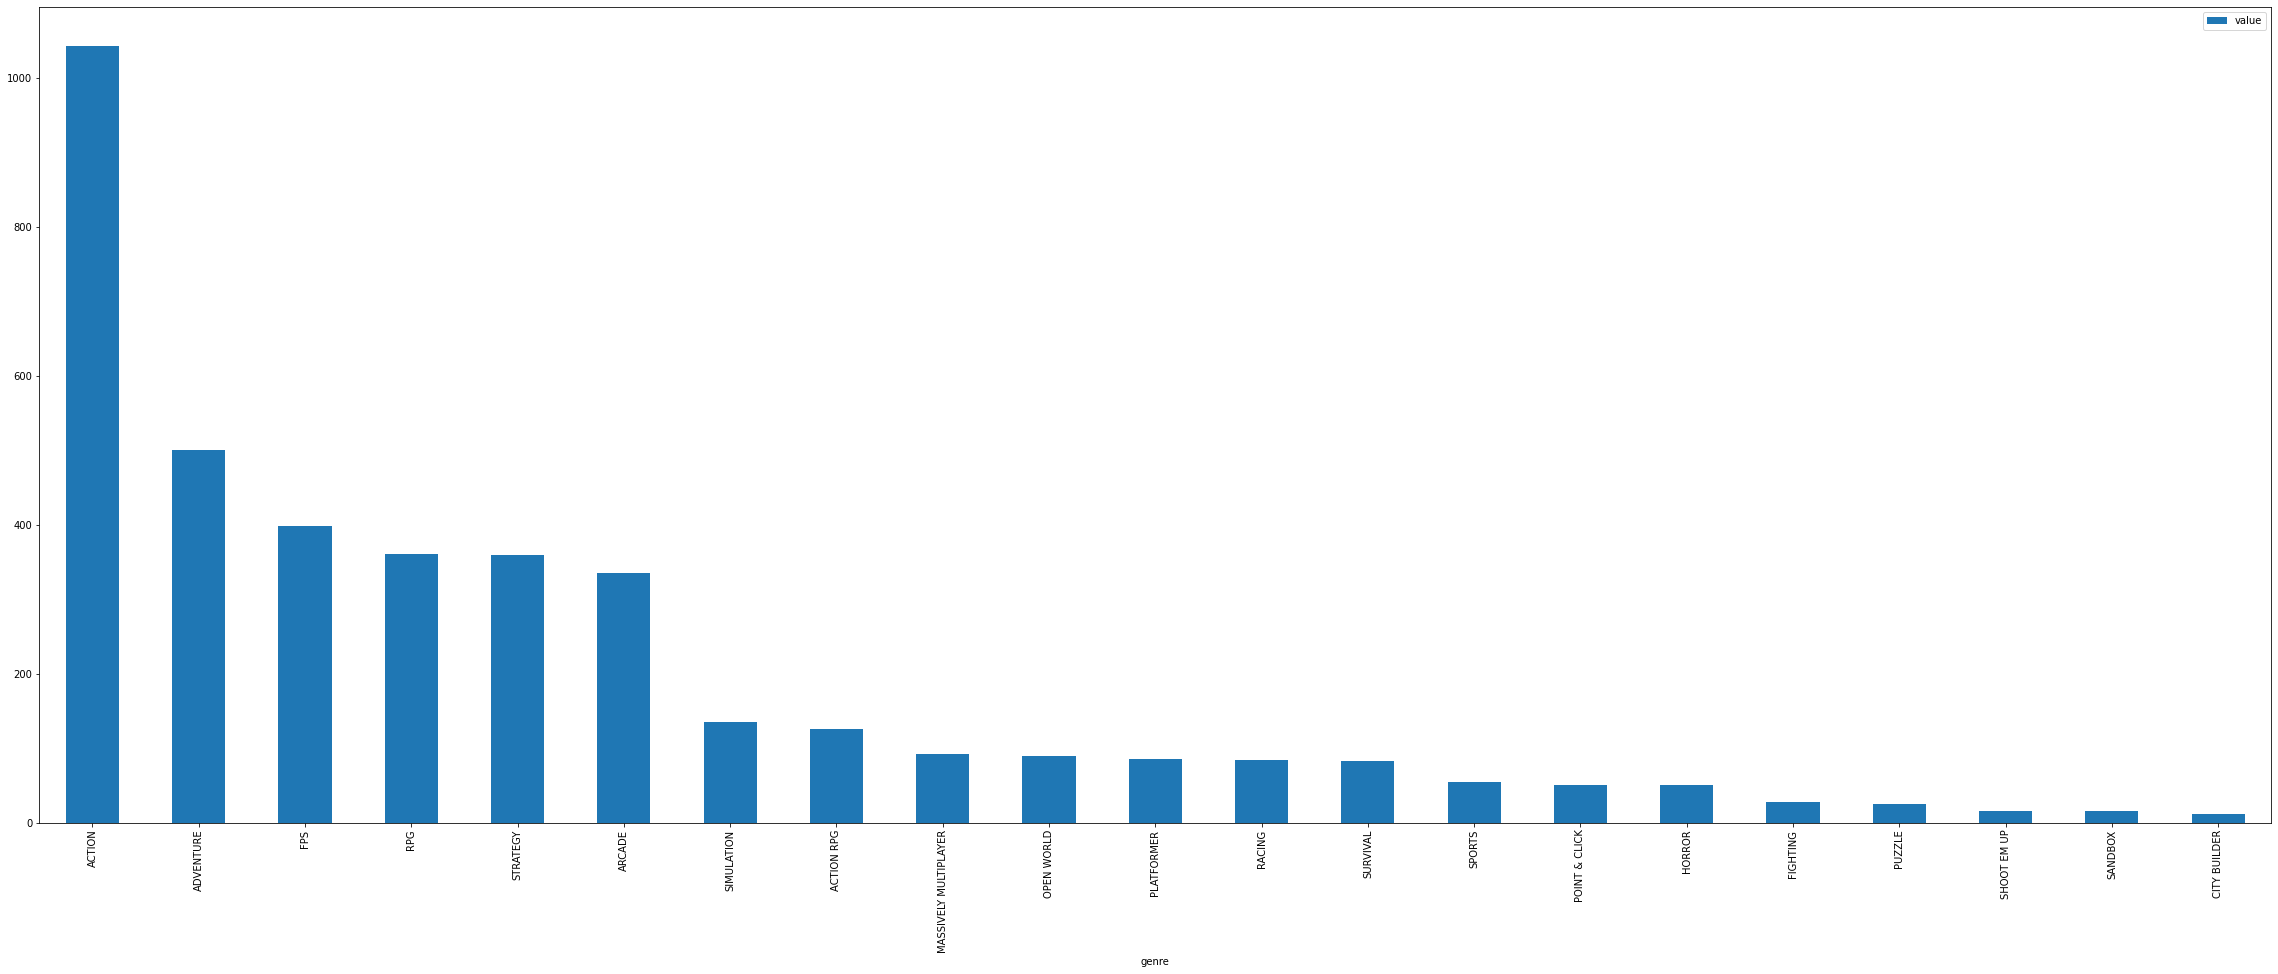

In [58]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

def metaGames():
    metaGames = pd.read_csv("../static/METACRITIC_PC_REVIEWS.csv")
    metaGames = metaGames[metaGames['userNumberReviews'] >= 20]
    genres = map(lambda x: x.replace("[","").replace("]","").replace('"',"").split(","),metaGames['genre'])
    outGenres = []
    for genre in genres:
        for subGenre in genre:
            outGenres.append(subGenre)
    genreDictionary = {}
    for genre in list(set(outGenres)):
        for index, game in metaGames.iterrows():
            if(genre in game['genre']):
                if genre not in genreDictionary.keys():
                    genreDictionary[genre] = []
                genreDictionary[genre].append(game['userMeanValue'])

    
    tempData = pd.DataFrame({"genre":list(genreDictionary.keys()),"value":list(genreDictionary.values())})
    tempData['value'] = list(map(lambda value: len(value),list(tempData['value'])))
    
    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres'] 

    tempData = tempData[tempData['genre'].isin(genresList)]

    tempData = tempData.sort_values(by='value',ascending=False)
    print(tempData)
    fig, ax = plt.subplots(figsize=(40,15))
    
    tempData.plot(kind='bar', x='genre', y='value', ax=ax)
    plt.show()

metaGames()

ACTION
ACTION RPG
ADVENTURE
ARCADE
FIGHTING
FPS
HORROR
MASSIVELY MULTIPLAYER
OPEN WORLD
PLATFORMER
POINT & CLICK
PUZZLE
RACING
RPG
SANDBOX
SHOOT EM UP
SIMULATION
SPORTS
STRATEGY
SURVIVAL


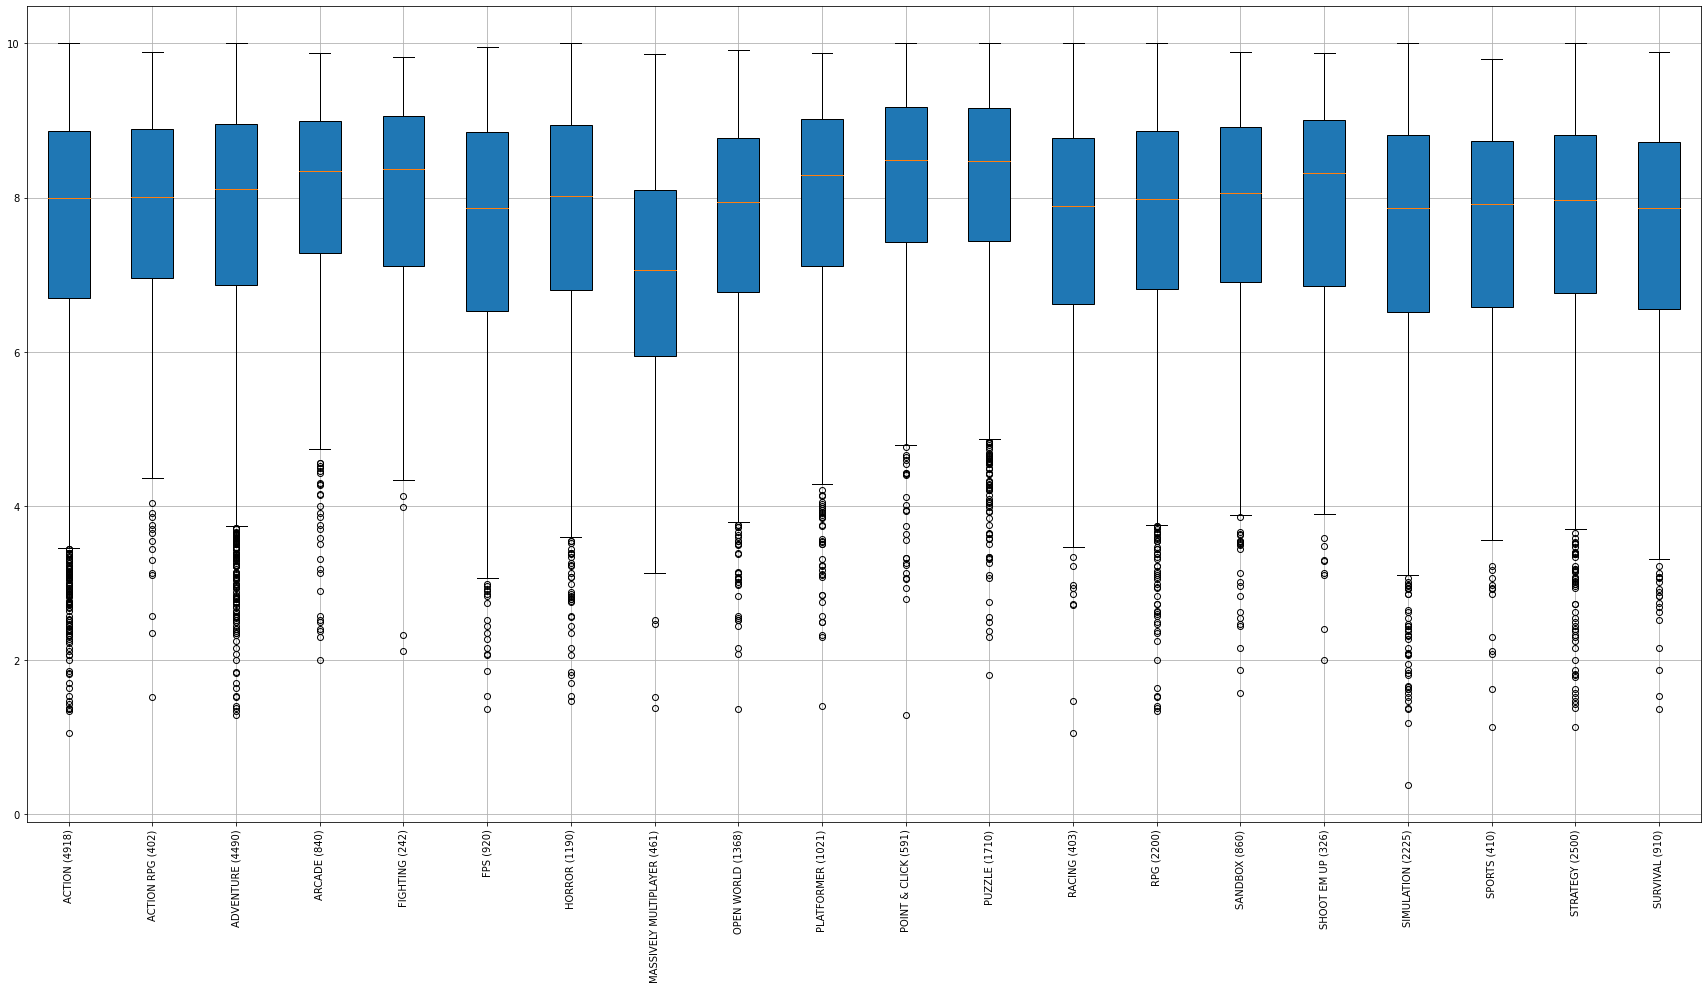

In [81]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def steamTags():
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamTags['likeRatio'] = steamTags.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*10 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres'] 
    columns = steamTags.columns.values
    genres = {}
    for column in columns:
        if ('tags.' not in column or column == "tags"):
            continue
        if (column.replace('tags.','') not in genresList):
            continue

        steamFiltered = steamTags[(steamTags[column].notna()) & (steamTags['avarageTime'] != 0) & (steamTags['positiveReviews'] + steamTags['negativeReviews'] >= 20)]
        numberOfGames = len(steamFiltered[column])
        print(column.replace('tags.',''))
        genres[column.replace('tags.','')] = steamFiltered['likeRatio']


    fig, ax = plt.subplots(figsize=(30,15))
    ax.boxplot(list(map(lambda genre: genres[genre],list(genres.keys()))))
    #ax.set_yscale('log')
    ax.grid(True)
    ax.set_xticklabels(list(map(lambda genre: f"{genre} ({len(genres[genre])})",genres.keys())),rotation=90)



steamTags()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'ACTION'),
  Text(1, 0, 'ACTION RPG'),
  Text(2, 0, 'ADVENTURE'),
  Text(3, 0, 'ARCADE'),
  Text(4, 0, 'FIGHTING'),
  Text(5, 0, 'HORROR'),
  Text(6, 0, 'MASSIVELY MULTIPLAYER'),
  Text(7, 0, 'OPEN WORLD'),
  Text(8, 0, 'PLATFORMER'),
  Text(9, 0, 'POINT & CLICK'),
  Text(10, 0, 'PUZZLE'),
  Text(11, 0, 'RACING'),
  Text(12, 0, 'RPG'),
  Text(13, 0, 'SANDBOX'),
  Text(14, 0, 'SHOOT EM UP'),
  Text(15, 0, 'FPS'),
  Text(16, 0, 'SIMULATION'),
  Text(17, 0, 'SPORTS'),
  Text(18, 0, 'STRATEGY'),
  Text(19, 0, 'SURVIVAL')])

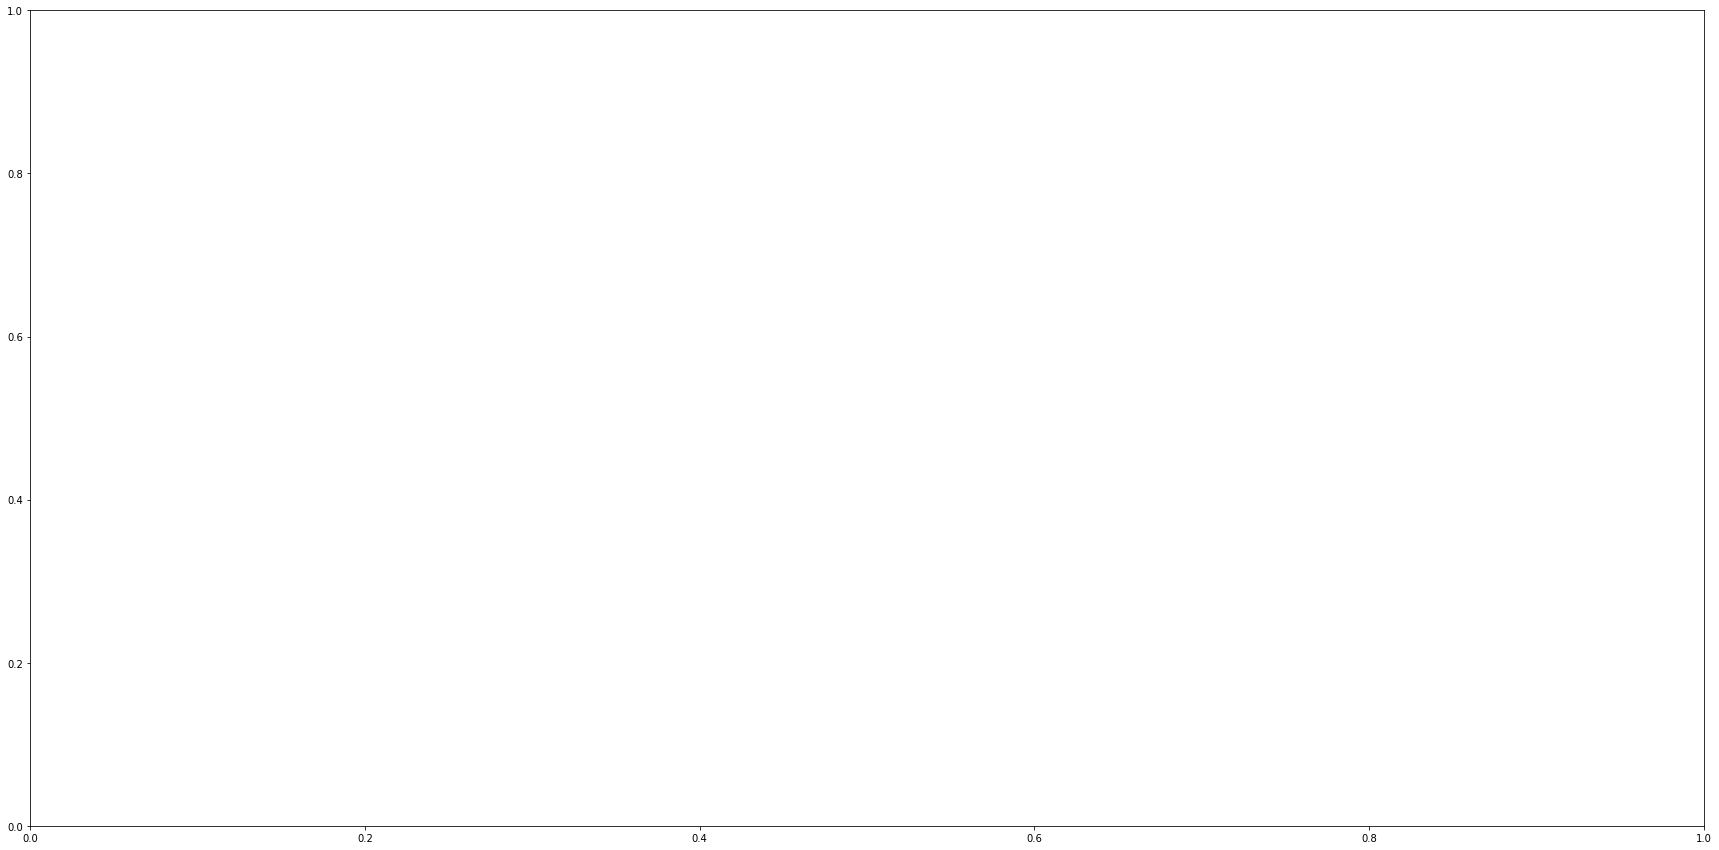

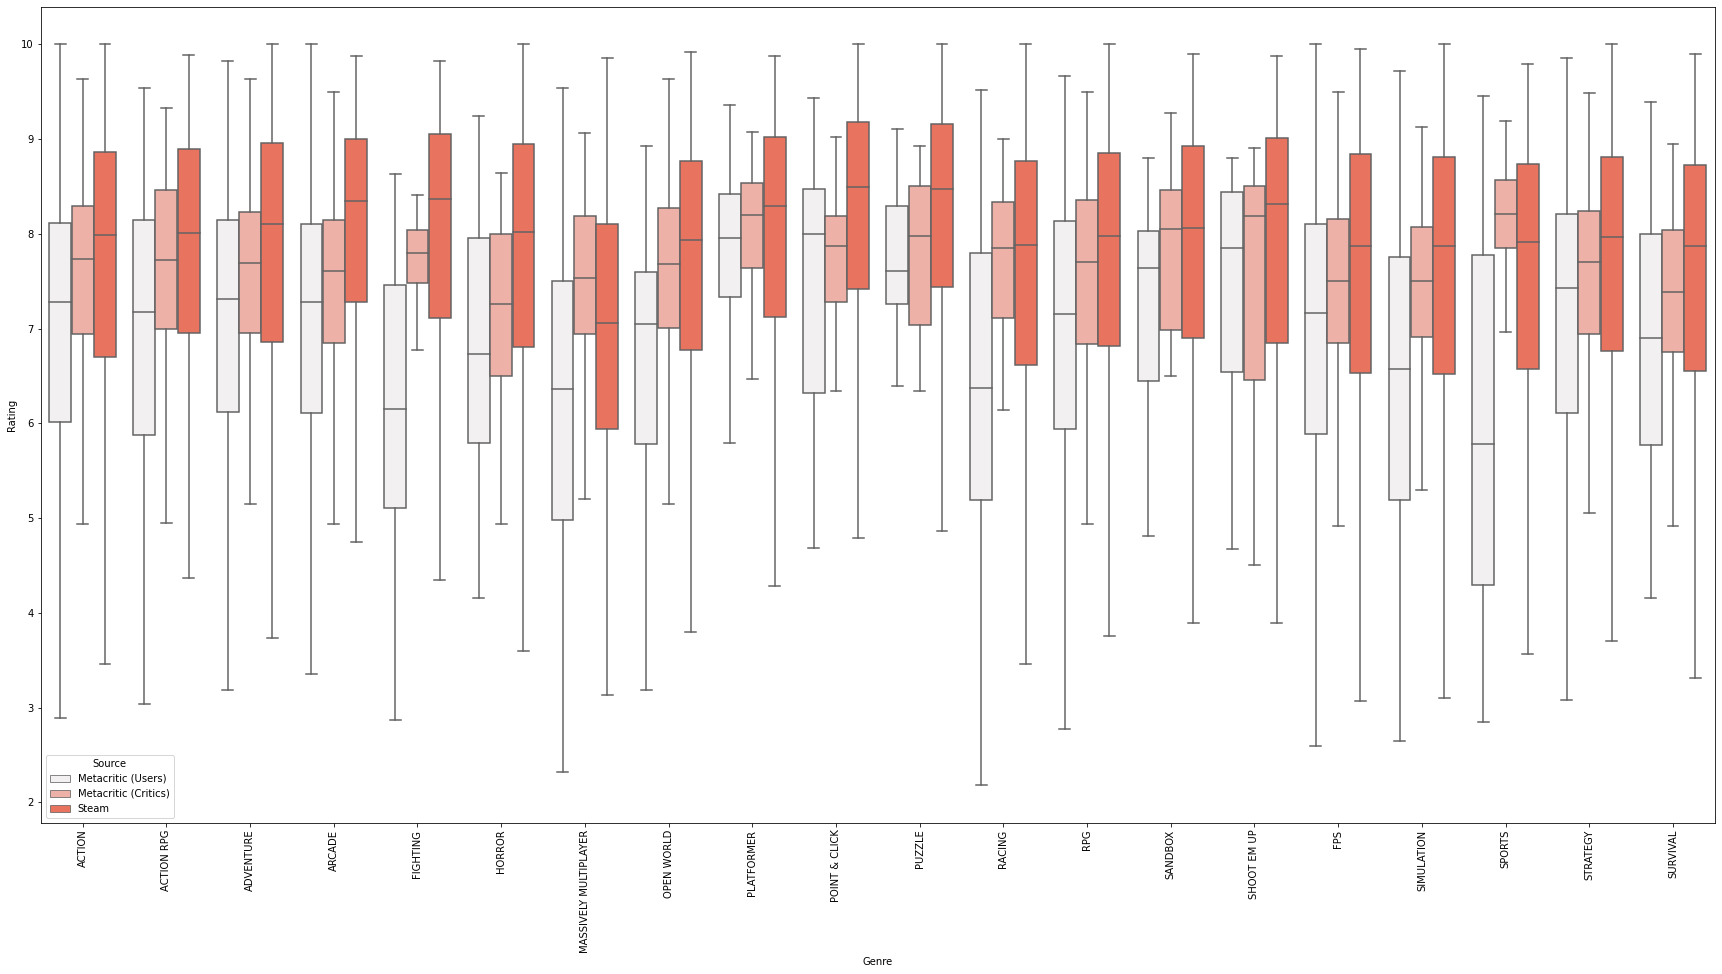

In [5]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

jsonToOpen = open('../static/genres.json', 'r').read()
genresList = json.loads(jsonToOpen)['genres']

def steamData(tag):
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamTags['likeRatio'] = steamTags.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*10 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    steamTags['numberReviews'] = steamTags.apply(lambda row: row['positiveReviews']+row['negativeReviews'], axis=1)
    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres'] 
    columns = steamTags.columns.values
    genres = {}
    for column in columns:
        if ('tags.' not in column or column == "tags"):
            continue
        if (column.replace('tags.','') not in genresList):
            continue

        steamFiltered = steamTags[(steamTags[column].notna()) & (steamTags['avarageTime'] != 0) & (steamTags['positiveReviews'] + steamTags['negativeReviews'] >= 20)]
        numberOfGames = len(steamFiltered[column])
        genres[column.replace('tags.','')] = list(steamFiltered[tag])

    return pd.DataFrame({"genre": list(genres.keys()),"value":list(genres.values())})

def metaData(tag):
    metaGames = pd.read_csv("../static/METACRITIC_PC_REVIEWS.csv")
    metaGames = metaGames[metaGames['userNumberReviews'] >= 20]
    metaGames['criticMeanValueNormalized'] = metaGames.apply(lambda row: row['criticMeanValue']/10, axis=1)
    genres = map(lambda x: x.replace("[","").replace("]","").replace('"',"").split(","),metaGames['genre'])

    
    genreDictionary = {}
    for genre in genresList:
        for index, game in metaGames.iterrows():
            if(genre in game['genre']):
                if genre not in genreDictionary.keys():
                    genreDictionary[genre] = []
                genreDictionary[genre].append(game[tag])
    fig, ax = plt.subplots(figsize=(30,15))
    genreArray = list(map(lambda genre: genreDictionary[genre],genresList))
    
    return pd.DataFrame({"genre": list(genreDictionary.keys()),"value":list(genreDictionary.values())})

steam = steamData('likeRatio')
metaUser = metaData('userMeanValue')
metaCritic = metaData('criticMeanValueNormalized')
outFrame = pd.DataFrame({"Genre": [], "Source": [], "Rating": []})

for index, row in metaUser.iterrows():
    for element in row['value']:
        outFrame = outFrame.append(pd.DataFrame({"Genre": [row['genre']], "Source": ["Metacritic (Users)"], "Rating": [element]}))

for index, row in metaCritic.iterrows():
    for element in row['value']:
        outFrame = outFrame.append(pd.DataFrame({"Genre": [row['genre']], "Source": ["Metacritic (Critics)"], "Rating": [element]}))

for index, row in steam.iterrows():
    for element in row['value']:
        outFrame = outFrame.append(pd.DataFrame({"Genre": [row['genre']], "Source": ["Steam"], "Rating": [element]}))


#for genre in genresList:
#    outFrame[outFrame['Genre'] == genre].to_csv(f"{genre}_boxplot.csv",index=False)

outFrame.to_csv(f"all_boxplot.csv",index=False)

sns.boxplot(x='Genre',y = 'Rating',data=outFrame,showfliers=False,color='tomato',hue='Source')
plt.xticks(rotation=90)
#plt.yscale('log')
#plt.savefig('genre_boxplots_prices.png')



6        119.645333
9        139.687500
10        31.118519
11        11.025758
12        40.130556
            ...    
34738      1.377778
34741     25.575000
34750     29.676389
34752      2.555556
34753      1.120000
Name: meanHours, Length: 15994, dtype: float64


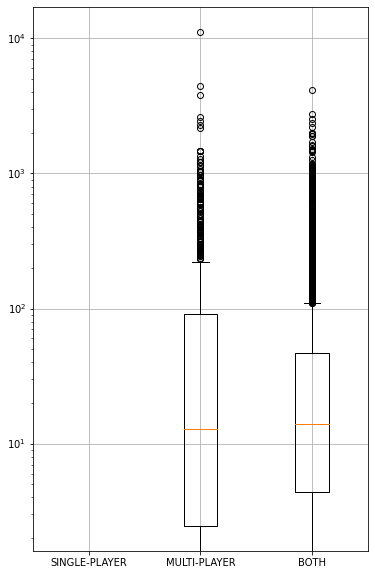

In [10]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def steamMode():
    steamGames = pd.read_csv("../static/STEAM_GAMES.csv").drop_duplicates()
    steamReviews =  pd.read_csv("../static/STEAM_REVIEWS.csv").drop_duplicates()
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv").drop_duplicates()
    steamGames = pd.merge(steamGames,steamReviews,how="inner",on=['gameId','gameId'])[[
        'gameId',
        'title',
        'priceInEur',
        'genre',
        'modality',
        'releaseDate',
        'positiveReviews',
        'negativeReviews',
        'meanHours'
    ]]
    steamGames = pd.merge(steamGames,steamTags,how="inner",on=['gameId','gameId'])[[
        'title_x',
        'priceInEur_y',
        'genre_y',
        'modality',
        'releaseDate',
        'positiveReviews_y',
        'negativeReviews_y',
        'meanHours',
        'avarageTime'
    ]]
    steamGames = steamGames.rename(columns={
        "title_x": "title",
        "priceInEur_y": "priceInEur",
        "positiveReviews_y":"positiveReviews",
        "negativeReviews_y":"negativeReviews",
        "genre_y": "genre"
    })
    steamGames['likeRatio'] = steamGames.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*10 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    steamGames['numberReviews'] = steamGames.apply(lambda row: row['positiveReviews']+row['negativeReviews'], axis=1)
    steamGames = steamGames[(steamGames['positiveReviews'] + steamGames['negativeReviews'] >= 20)]
    onlyMulti = steamGames[(steamGames['modality'].str.contains('MULTI-PLAYER')) & (~steamGames['modality'].str.contains('SINGLE-PLAYER'))]
    onlySingle = steamGames[(~steamGames['modality'].str.contains('MULTI-PLAYER')) & (steamGames['modality'].str.contains('SINGLE-PLAYER'))]
    bothModality = steamGames[(steamGames['modality'].str.contains('MULTI-PLAYER')) & (steamGames['modality'].str.contains('SINGLE-PLAYER'))]
    likeData = { "SINGLE": onlySingle['likeRatio'], "MULTI": onlyMulti['likeRatio'], "BOTH": bothModality['likeRatio']}
    priceData = { "SINGLE": onlySingle['priceInEur'], "MULTI": onlyMulti['priceInEur'], "BOTH": bothModality['priceInEur']}
    hoursData = { "SINGLE": onlySingle['meanHours'], "MULTI": onlyMulti['meanHours'], "BOTH": bothModality['meanHours']}
    reviewData = { "SINGLE": onlySingle['numberReviews'], "MULTI": onlyMulti['numberReviews'], "BOTH": bothModality['numberReviews']}

    print(onlySingle['meanHours'])
    fig, ax = plt.subplots(figsize=(6, 10))
    ax.boxplot([list(onlySingle['meanHours']),list(onlyMulti['meanHours']),list(bothModality['meanHours'])])
    ax.set_yscale('log')
    ax.grid(True)
    ax.set_xticklabels(['SINGLE-PLAYER','MULTI-PLAYER','BOTH'])
    #plt.savefig('modality_boxplot_meanhours.png')

steamMode()

In [1]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt


def steamTags():
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamTags['likeRatio'] = steamTags.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*100 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres'] 
    columns = steamTags.columns.values
    genres = {}
    for column in columns:
        if ('tags.' not in column or column == "tags"):
            continue
        steamFiltered = steamTags[(steamTags[column].notna()) & (steamTags['avarageTime'] != 0) & (steamTags['positiveReviews'] + steamTags['negativeReviews'] >= 100)]
        numberOfGames = len(steamFiltered[column])
        genres[column.replace('tags.','')] = numberOfGames
    tempData = pd.DataFrame({"genre":list(genres.keys()),"value":list(genres.values())})
    tempData = tempData[tempData['genre'].isin(genresList)]
    print(tempData)

    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres'] 

    #fig, ax = plt.subplots(figsize=(10,10))
    #ax.pie(list(tempData['value']), labels=list(tempData['genre']), autopct='%1.1f%%',radius=10000, startangle=90)
    #ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #fig.savefig('genres_pie_steam.png')
    



steamTags()


                     genre  value
9                   ACTION   4278
11              ACTION RPG    372
13               ADVENTURE   3919
17                  ARCADE    723
62                FIGHTING    226
66                     FPS    886
75                  HORROR   1090
91   MASSIVELY MULTIPLAYER    439
108             OPEN WORLD   1332
114             PLATFORMER    874
115          POINT & CLICK    511
122                 PUZZLE   1461
126                 RACING    355
136                    RPG   1961
138                SANDBOX    826
143            SHOOT EM UP    274
147             SIMULATION   1945
151                 SPORTS    357
153               STRATEGY   2191
157               SURVIVAL    862


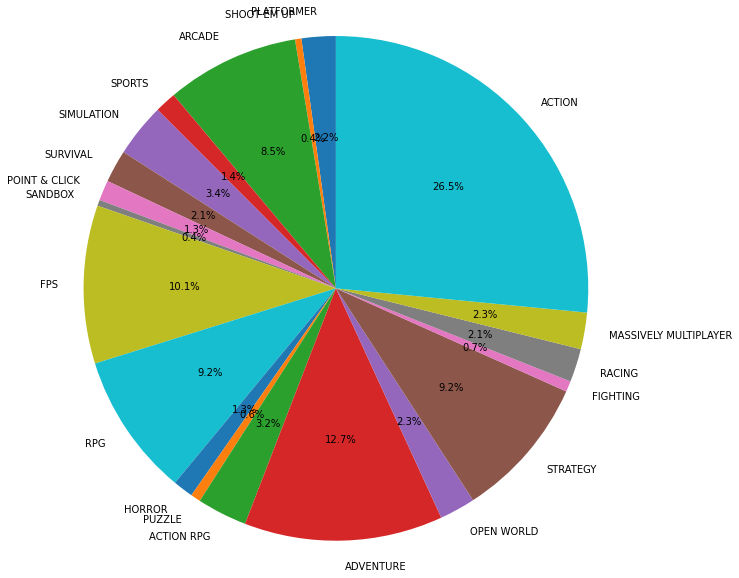

In [18]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

def metaGames():
    metaGames = pd.read_csv("../static/METACRITIC_PC_REVIEWS.csv")
    metaGames = metaGames[metaGames['userNumberReviews'] >= 20]
    genres = map(lambda x: x.replace("[","").replace("]","").replace('"',"").split(","),metaGames['genre'])
    outGenres = []
    for genre in genres:
        for subGenre in genre:
            outGenres.append(subGenre)
    genreDictionary = {}
    for genre in list(set(outGenres)):
        for index, game in metaGames.iterrows():
            if(genre in game['genre']):
                if genre not in genreDictionary.keys():
                    genreDictionary[genre] = []
                genreDictionary[genre].append(game['userMeanValue'])

    
    tempData = pd.DataFrame({"genre":list(genreDictionary.keys()),"value":list(genreDictionary.values())})
    tempData['value'] = list(map(lambda value: len(value),list(tempData['value'])))
    
    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres'] 

    tempData = tempData[tempData['genre'].isin(genresList)]

    print(tempData)

    #fig, ax = plt.subplots(figsize=(10,10))
    #ax.pie(list(tempData['value']), labels=list(tempData['genre']), autopct='%1.1f%%',radius=10000, startangle=90)
    #ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #fig.savefig('genres_pie_meta.png')
    

metaGames()

In [9]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def steamMode():
    steamGames = pd.read_csv("../static/STEAM_GAMES.csv").drop_duplicates()
    steamReviews =  pd.read_csv("../static/STEAM_REVIEWS.csv").drop_duplicates()
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv").drop_duplicates()
    steamGames = pd.merge(steamGames,steamReviews,how="inner",on=['gameId','gameId'])[[
        'gameId',
        'title',
        'priceInEur',
        'genre',
        'modality',
        'releaseDate',
        'positiveReviews',
        'negativeReviews',
        'meanHours'
    ]]
    steamGames = pd.merge(steamGames,steamTags,how="inner",on=['gameId','gameId'])[[
        'title_x',
        'priceInEur_y',
        'genre_y',
        'modality',
        'releaseDate',
        'positiveReviews_y',
        'negativeReviews_y',
        'meanHours',
        'avarageTime'
    ]]
    steamGames = steamGames.rename(columns={
        "title_x": "title",
        "priceInEur_y": "priceInEur",
        "positiveReviews_y":"positiveReviews",
        "negativeReviews_y":"negativeReviews",
        "genre_y": "genre"
    })
    steamGames['likeRatio'] = steamGames.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*10 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    steamGames['numberReviews'] = steamGames.apply(lambda row: row['positiveReviews']+row['negativeReviews'], axis=1)
    steamGames = steamGames[(steamGames['positiveReviews'] + steamGames['negativeReviews'] >= 20)]
    steamGames = steamGames.drop_duplicates()

    outFrame = pd.DataFrame({"Rating": [], "Reviews": [], "Price": [], "Hours": [], "MODE": [], "TITLE": []})
    for index, row in steamGames.iterrows():
        modality = ""
        if ('MULTI-PLAYER' in row['modality'] and 'SINGLE-PLAYER' in row['modality']):
            modality = "BOTH"
            print(row['modality'])
        elif ('MULTI-PLAYER' in row['modality'] and 'SINGLE-PLAYER' not in row['modality']):
            modality = "MULTI-PLAYER"
            print(row['modality'])
        elif ('MULTI-PLAYER' not in row['modality'] and 'SINGLE-PLAYER' in row['modality']):
            modality = "SINGLE-PLAYER"
            print(row['modality'])
        else:
            continue
        outFrame = outFrame.append(pd.DataFrame({"Rating": [row['likeRatio']], "Reviews": [], "Price": [row['priceInEur']], "Hours": [row['meanHours']], "Mode": modality, "Title": [row['title']]}))
    
    print(outFrame)
    outFrame.to_csv(f"genre_boxplot.csv",index=False)

steamMode()

EAM ACHIEVEMENTS","STEAM CLOUD","STEAM LEADERBOARDS"]
["SINGLE-PLAYER"]
["SINGLE-PLAYER","STEAM ACHIEVEMENTS"]
["SINGLE-PLAYER"]
["SINGLE-PLAYER","MULTI-PLAYER","CO-OP","SHARED/SPLIT SCREEN CO-OP","SHARED/SPLIT SCREEN","STEAM ACHIEVEMENTS","FULL CONTROLLER SUPPORT","REMOTE PLAY TOGETHER"]
["SINGLE-PLAYER","STEAM ACHIEVEMENTS","FULL CONTROLLER SUPPORT"]
["SINGLE-PLAYER"]
["SINGLE-PLAYER","STEAM ACHIEVEMENTS"]
["SINGLE-PLAYER"]
["SINGLE-PLAYER"]
["SINGLE-PLAYER","STEAM ACHIEVEMENTS","FULL CONTROLLER SUPPORT","STEAM CLOUD"]
["SINGLE-PLAYER","STEAM ACHIEVEMENTS","FULL CONTROLLER SUPPORT","STEAM CLOUD"]
["SINGLE-PLAYER","STEAM ACHIEVEMENTS"]
["SINGLE-PLAYER","FULL CONTROLLER SUPPORT","STEAM CLOUD"]
["SINGLE-PLAYER","PARTIAL CONTROLLER SUPPORT"]
["SINGLE-PLAYER","MULTI-PLAYER","PVP","ONLINE PVP","STEAM ACHIEVEMENTS","STEAM TRADING CARDS"]
["SINGLE-PLAYER","STEAM CLOUD"]
["SINGLE-PLAYER"]
["SINGLE-PLAYER"]
["SINGLE-PLAYER","STEAM ACHIEVEMENTS"]
["SINGLE-PLAYER","STEAM ACHIEVEMENTS"]
["SINGLE-

In [1]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt




{'SINGLE': 6         89.823169
9         88.607595
10        94.897959
11        96.024465
12        83.333333
            ...    
34715     94.545455
34722    100.000000
34724     83.783784
34755     93.939394
34757     84.000000
Name: likeRatio, Length: 10075, dtype: float64, 'MULTI': 0        96.451216
1        96.451216
2        96.451216
3        96.451216
45       95.503275
           ...    
33483    81.699346
33816    58.181818
33855    89.705882
33957    62.562814
34096    89.189189
Name: likeRatio, Length: 532, dtype: float64, 'BOTH': 4         95.350100
5         95.226891
8         78.160920
13        88.444444
14        95.489834
            ...    
34222     88.636364
34233     85.714286
34238    100.000000
34302     74.000000
34382     66.666667
Name: likeRatio, Length: 3489, dtype: float64}


In [ ]:
from pymongo import MongoClient
import pandas as pd
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

jsonToOpen = open('../static/genres.json', 'r').read()
genresList = json.loads(jsonToOpen)['genres']

def steamData(tag):
    steamTags = pd.read_csv("../static/STEAM_TAGS.csv")
    steamTags['likeRatio'] = steamTags.apply(lambda row: row['positiveReviews']/(row['positiveReviews']+row['negativeReviews'])*10 if row['positiveReviews']+row['negativeReviews'] != 0 else 0, axis=1)
    steamTags['numberReviews'] = steamTags.apply(lambda row: row['positiveReviews']+row['negativeReviews'], axis=1)
    jsonToOpen = open('../static/genres.json', 'r').read()
    genresList = json.loads(jsonToOpen)['genres'] 
    columns = steamTags.columns.values
    genres = {}
    for column in columns:
        if ('tags.' not in column or column == "tags"):
            continue
        if (column.replace('tags.','') not in genresList):
            continue

        steamFiltered = steamTags[(steamTags[column].notna()) & (steamTags['avarageTime'] != 0) & (steamTags['positiveReviews'] + steamTags['negativeReviews'] >= 20)]
        numberOfGames = len(steamFiltered[column])
        genres[column.replace('tags.','')] = list(steamFiltered[tag])

    return pd.DataFrame({"genre": list(genres.keys()),"value":list(genres.values())})

def metaData(tag):
    metaGames = pd.read_csv("../static/METACRITIC_PC_REVIEWS.csv")
    metaGames = metaGames[metaGames['userNumberReviews'] >= 20]
    metaGames['criticMeanValueNormalized'] = metaGames.apply(lambda row: row['criticMeanValue']/10, axis=1)
    genres = map(lambda x: x.replace("[","").replace("]","").replace('"',"").split(","),metaGames['genre'])

    
    genreDictionary = {}
    for genre in genresList:
        for index, game in metaGames.iterrows():
            if(genre in game['genre']):
                if genre not in genreDictionary.keys():
                    genreDictionary[genre] = []
                genreDictionary[genre].append(game[tag])
    fig, ax = plt.subplots(figsize=(30,15))
    genreArray = list(map(lambda genre: genreDictionary[genre],genresList))
    
    return pd.DataFrame({"genre": list(genreDictionary.keys()),"value":list(genreDictionary.values())})

steam = steamData('likeRatio')
metaUser = metaData('userMeanValue')
metaCritic = metaData('criticMeanValueNormalized')
outFrame = pd.DataFrame({"Genre": [], "Source": [], "Rating": []})

for index, row in metaUser.iterrows():
    for element in row['value']:
        outFrame = outFrame.append(pd.DataFrame({"Genre": [row['genre']], "Source": ["Metacritic (Users)"], "Rating": [element]}))

for index, row in metaCritic.iterrows():
    for element in row['value']:
        outFrame = outFrame.append(pd.DataFrame({"Genre": [row['genre']], "Source": ["Metacritic (Critics)"], "Rating": [element]}))

for index, row in steam.iterrows():
    for element in row['value']:
        outFrame = outFrame.append(pd.DataFrame({"Genre": [row['genre']], "Source": ["Steam"], "Rating": [element]}))


#for genre in genresList:
#    outFrame[outFrame['Genre'] == genre].to_csv(f"{genre}_boxplot.csv",index=False)

outFrame.to_csv(f"all_boxplot.csv",index=False)

sns.boxplot(x='Genre',y = 'Rating',data=outFrame,showfliers=False,color='tomato',hue='Source')
plt.xticks(rotation=90)
#plt.yscale('log')
#plt.savefig('genre_boxplots_prices.png')

